# Plot density

In [5]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
from scripts.plots_stats.get_df_ssp import get_df_ssp

In [7]:
df_ssp = get_df_ssp()

(30544, 23) (30544, 23) (30544, 23) (30498, 23) (30498, 23) (30498, 23)
(30498, 41) (30544, 41)
Total number of cities 30498


### Plot current per cap distn

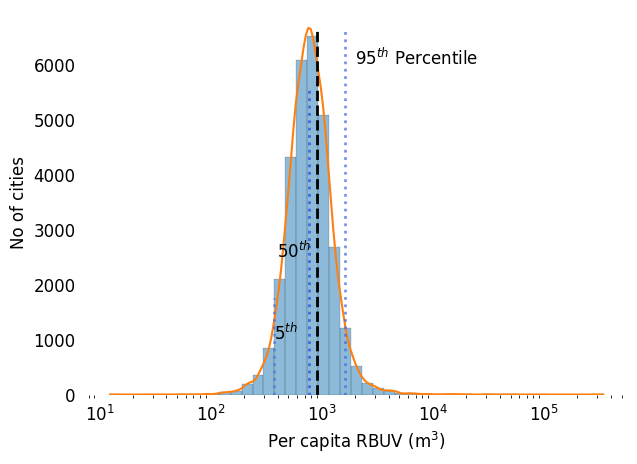

2.5197684777677365 12.74166235016822 12.425719500210583 341691.08586883073


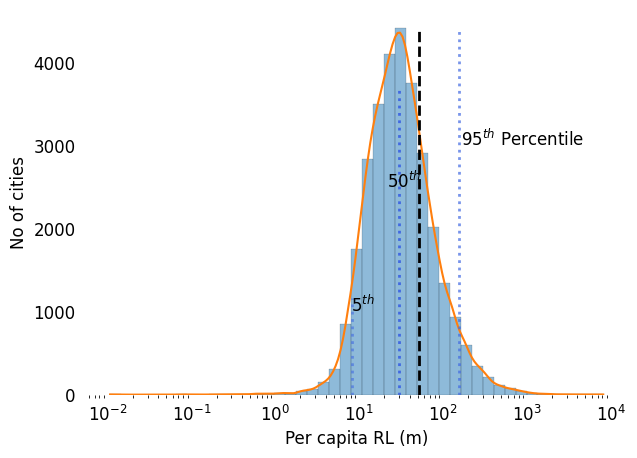

(-4.5355247344300444,
 9.009251254111163,
 0.010721279925512096,
 8178.3954419201755)

In [8]:
from scripts.plots_stats.plot_funcs import plot_distribution

plot_distribution(df_ssp['volume_m3_perCap_2020_ssp2'], [-3, 19], label_text = "Per capita RBUV (m$^3$)", p95_position =6000)
print(np.log(df_ssp['volume_m3_perCap_2020_ssp2']).min(), np.log(df_ssp['volume_m3_perCap_2020_ssp2']).max(), np.exp(np.log(df_ssp['volume_m3_perCap_2020_ssp2']).min()), np.exp(np.log(df_ssp['volume_m3_perCap_2020_ssp2']).max()))

plot_distribution(df_ssp['length_m_perCap_2020_ssp2'],[-8, 15], label_text = "Per capita RL (m)", p95_position=3000)
np.log(df_ssp['length_m_perCap_2020_ssp2']).min(), np.log(df_ssp['length_m_perCap_2020_ssp2']).max(), np.exp(np.log(df_ssp['length_m_perCap_2020_ssp2']).min()), np.exp(np.log(df_ssp['length_m_perCap_2020_ssp2']).max())

### Plot by region and city type

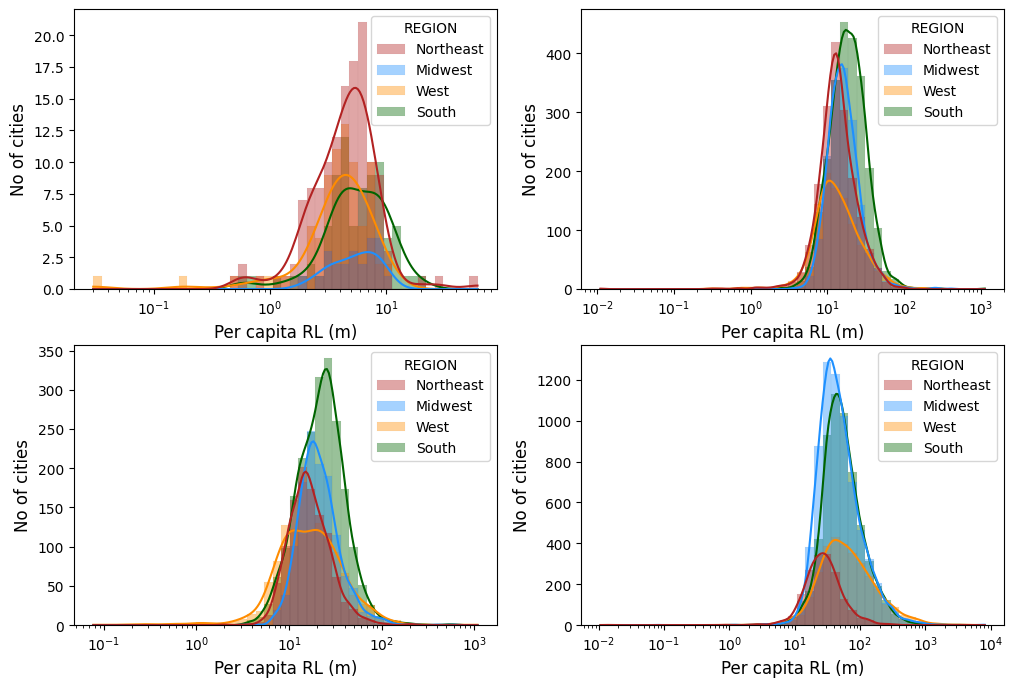

In [9]:
hue = 'REGION'
hu_order = ['Northeast', 'Midwest', 'West', 'South']
citytypes = ['urban', 'suburban', 'periurban', 'rural']
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (12,8))
ax = axs.flatten()
for i, city in enumerate(citytypes):
    df_plot = df_ssp[df_ssp['city type'] == city]
    sns.histplot(df_plot, x = 'length_m_perCap_2020_ssp2', #stat = 'proportion',
                 log_scale=True, bins = 45,linewidth=0.01, alpha = .40, hue =hue, hue_order = hu_order, kde=True, kde_kws = {'cut': 0}, ax=ax[i],
                 palette= ['firebrick','dodgerblue', 'darkorange','darkgreen'],
                 )
    ax[i].set_xlabel("Per capita RL (m)", fontsize=12)
    ax[i].set_ylabel("No of cities", fontsize=12)

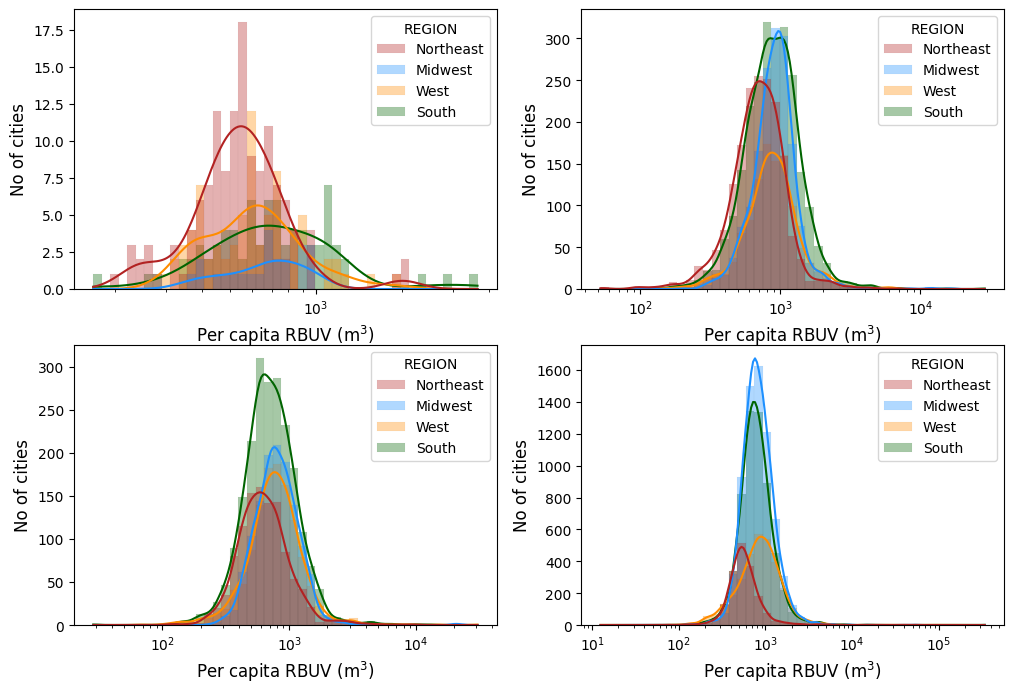

In [10]:
hue = 'REGION'
hu_order = ['Northeast', 'Midwest', 'West', 'South']
citytypes = ['urban', 'suburban', 'periurban', 'rural']
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (12,8))
ax = axs.flatten()
for i, city in enumerate(citytypes):
    df_plot = df_ssp[df_ssp['city type'] == city]
    sns.histplot(df_plot, x = 'volume_m3_perCap_2020_ssp2', #stat = 'proportion',
                 log_scale=True, bins = 45,linewidth=0.01, alpha = .35, hue =hue, hue_order = hu_order, kde=True, kde_kws = {'cut': 0}, ax=ax[i],
                 palette= ['firebrick','dodgerblue', 'darkorange','darkgreen'],
                 )
    ax[i].set_xlabel("Per capita RBUV (m$^3$)", fontsize=12)
    ax[i].set_ylabel("No of cities", fontsize=12)

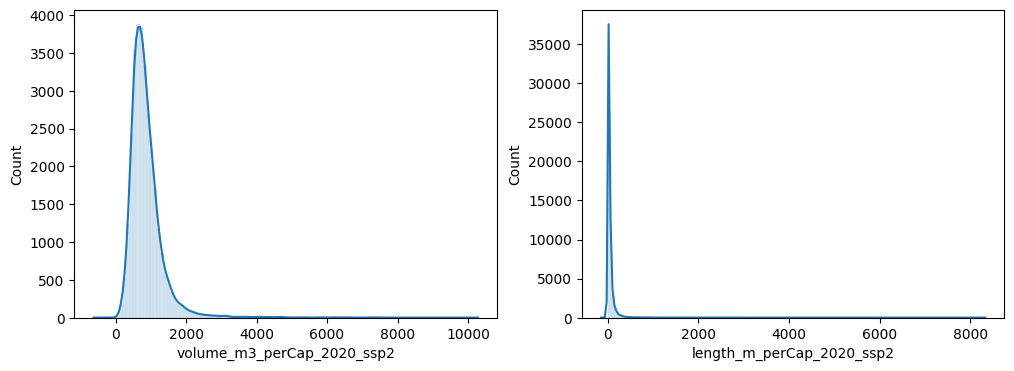

In [11]:
df_less_than10000 = df_ssp[df_ssp['volume_m3_perCap_2020_ssp2'] < 10000]
# df_less_than10000 = df_ssp[df_ssp['length_m_perCap_2020_ssp2'] < 1000]
columns = ['volume_m3_perCap_2020_ssp2', 'length_m_perCap_2020_ssp2']
fig, axs = plt.subplots(nrows = 1, ncols =2, figsize = (12,4))
ax = axs.flatten()
for i, col in enumerate(columns):
  
  sns.histplot(df_less_than10000, x = col, #stat = 'proportion',
                #  log_scale=True,
                   bins = 100,linewidth=0.01, alpha = .20, #hue =hue, hue_order = hu_order, 
                   kde=True, kde_kws = {'cut': 10},
                   ax=ax[i],
                #  palette= ['firebrick','dodgerblue', 'darkorange','darkgreen'],
                 )
   #  ax[i].set_xlabel("Per capita RL (m)", fontsize=12)
   # ax[i].set_ylabel("No of cities", fontsize=12)

Text(0, 0.5, 'No of cities')

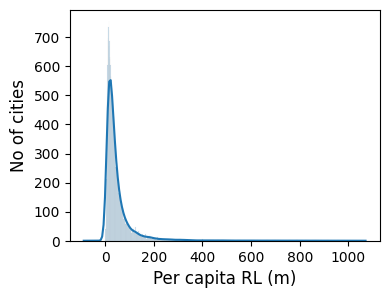

In [12]:
df_less_than10000 = df_ssp[df_ssp['length_m_perCap_2020_ssp2'] <= 1000]
# df_less_than10000 = df_ssp[df_ssp['length_m_perCap_2020_ssp2'] < 1000]
columns = ['volume_m3_perCap_2020_ssp2', 'length_m_perCap_2020_ssp2']
fig, ax= plt.subplots(nrows = 1, ncols =1, figsize = (4,3))
# ax = axs.flatten()
sns.histplot(df_less_than10000, x = columns[1], #stat = 'proportion',
                #  log_scale=True,
                   bins = 1000,linewidth=0.01, alpha = .20, #hue =hue, hue_order = hu_order, 
                   kde=True, kde_kws = {'cut': 10},
                   ax=ax,
                #  palette= ['firebrick','dodgerblue', 'darkorange','darkgreen'],
                 )
ax.set_xlabel("Per capita RL (m)", fontsize=12)
ax.set_ylabel("No of cities", fontsize=12)

In [125]:
df_less_than10000.columns

Index(['GEOID', 'NAMELSAD', 'city type', 'REGION', 'ALAND', 'CensusPop_20',
       'ssp12030', 'ssp12040', 'ssp12050', 'ssp12060',
       ...
       'RBUV_Burden_2050_ssp4', 'RBUV_Burden_2100_ssp4', 'RBUV_Burden_2030_in',
       'RBUV_Burden_2040_in', 'RBUV_Burden_2050_in', 'RBUV_Burden_2060_in',
       'RBUV_Burden_2070_in', 'RBUV_Burden_2080_in', 'RBUV_Burden_2090_in',
       'RBUV_Burden_2100_in'],
      dtype='object', length=179)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


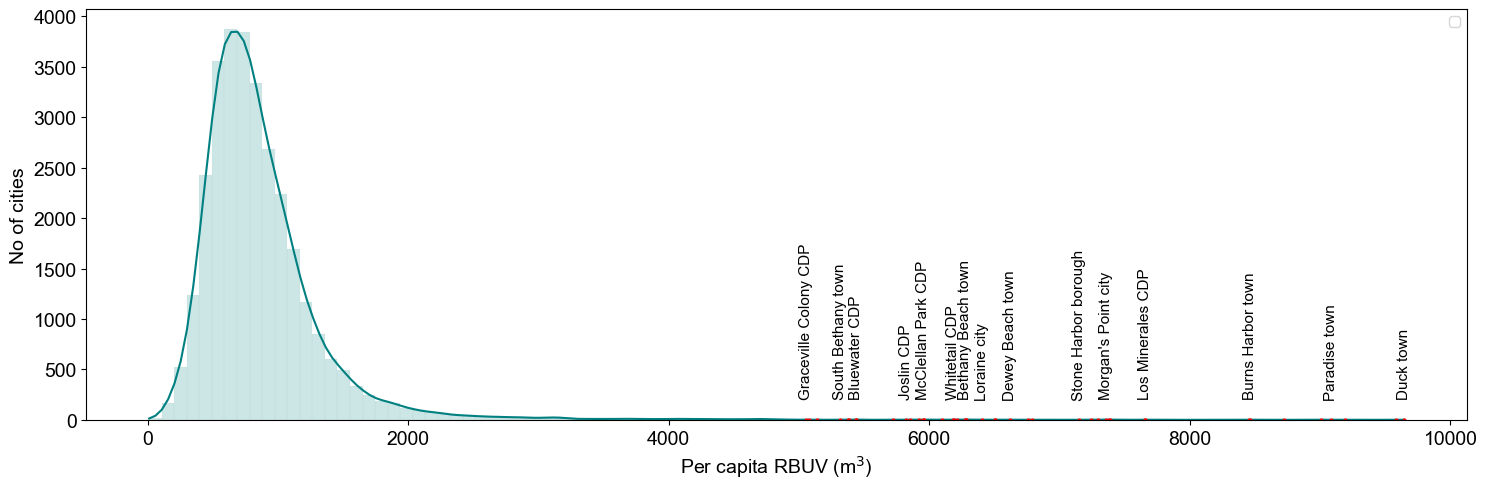

In [120]:
df_less_than10000 = df_ssp[df_ssp['volume_m3_perCap_2020_ssp2'] <= 10000]
# Sample data
data = {
    'name': df_less_than10000['NAMELSAD'],
    'group': df_less_than10000['city type'],
    'value': df_less_than10000['volume_m3_perCap_2020_ssp2'],
    }
df = pd.DataFrame(data)

# Detect outliers using IQR
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = 5000 # Q3 + 1.5 * IQR
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)].copy()

# Sort for better spacing
outliers = outliers.sort_values('value').reset_index(drop=True)


# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Plot histogram (counts) + KDE
plt.figure(figsize=(15, 5))
sns.histplot(df['value'], bins = 100,linewidth=0.02, alpha = .20, kde=True, stat='count', color='teal', edgecolor='grey')

# Get bin heights for label positioning
bin_counts, bin_edges = np.histogram(df['value'], bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
height_lookup = dict(zip(bin_centers, bin_counts))

# Label every other outlier
for i, row in outliers.iterrows():
    closest_bin = min(bin_centers, key=lambda x: abs(x - row['value']))
    height = height_lookup[closest_bin]
    
    spacing = max(height * 0.1, 200)  # Add 100% padding or at least 500 units
    label_y = height + spacing

    plt.plot(row['value'], 0, 'ro', markersize=2)  # red dot at base
    if i % 3 == 0:
        plt.text(row['value'], label_y, row['name'],
                 rotation=90, ha='center', va='bottom', color='black', fontsize=11)

# Set tick label font size and apply the Arial font
plt.tick_params(axis='both', labelsize=14)
# plt.title("Histogram with Counts, KDE, and Spaced Outlier Labels")
plt.xlabel("Per capita RBUV (m$^3$)", fontsize=14)
plt.ylabel("No of cities", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


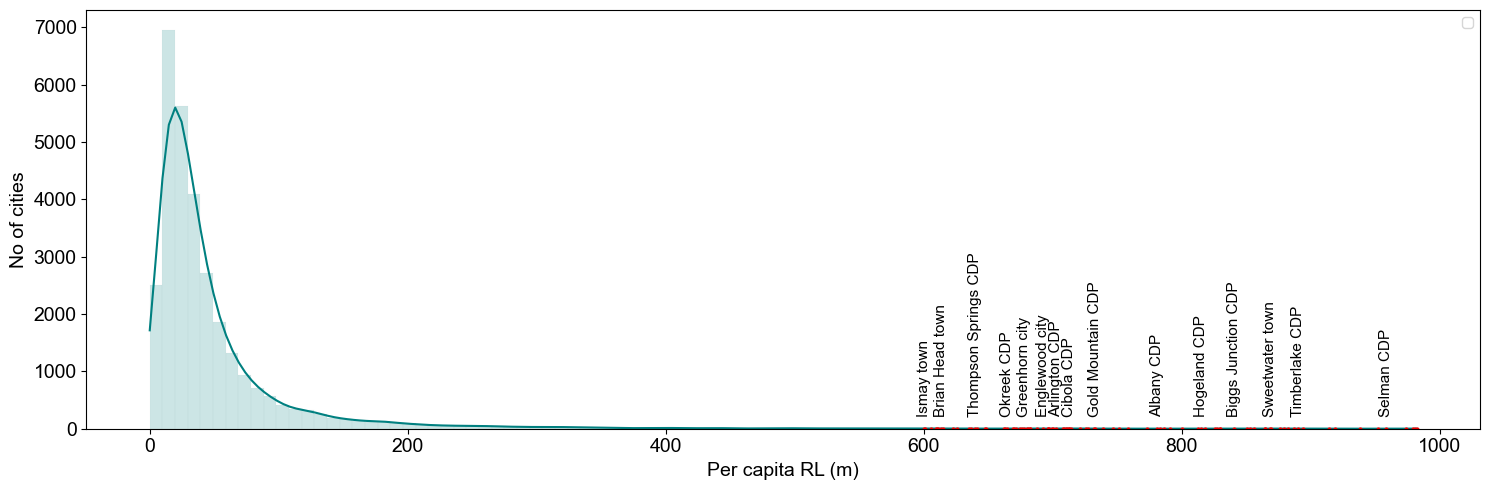

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_less_than10000 = df_ssp[df_ssp['length_m_perCap_2020_ssp2'] <= 1000]
# Sample data
data = {
    'name': df_less_than10000['NAMELSAD'],
    'group': df_less_than10000['city type'],
    'value': df_less_than10000['length_m_perCap_2020_ssp2'],
    }
df = pd.DataFrame(data)

# Detect outliers using IQR
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = 600 # Q3 + 1.5 * IQR
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)].copy()

# Sort for better spacing
outliers = outliers.sort_values('value').reset_index(drop=True)


# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Plot histogram (counts) + KDE
plt.figure(figsize=(15, 5))
sns.histplot(df['value'], bins = 100,linewidth=0.02, alpha = .20, kde=True, stat='count', color='teal', edgecolor='grey')

# Get bin heights for label positioning
bin_counts, bin_edges = np.histogram(df['value'], bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
height_lookup = dict(zip(bin_centers, bin_counts))

# Label every other outlier
for i, row in outliers.iterrows():
    closest_bin = min(bin_centers, key=lambda x: abs(x - row['value']))
    height = height_lookup[closest_bin]
    
    spacing = max(height * 0.1, 200)  # Add 100% padding or at least 500 units
    label_y = height + spacing

    plt.plot(row['value'], 0, 'ro', markersize=2)  # red dot at base
    if i % 6 == 0:
        plt.text(row['value'], label_y, row['name'],
                 rotation=90, ha='center', va='bottom', color='black', fontsize=11)

# Set tick label font size and apply the Arial font
plt.tick_params(axis='both', labelsize=14)
# plt.title("Histogram with Counts, KDE, and Spaced Outlier Labels")
plt.xlabel("Per capita RL (m)", fontsize=14)
plt.ylabel("No of cities", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'No of cities')

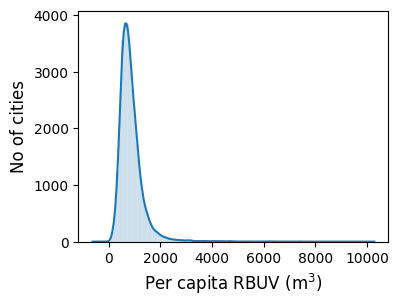

In [10]:
df_less_than10000 = df_ssp[df_ssp['volume_m3_perCap_2020_ssp2'] <= 10000]
# df_less_than10000 = df_ssp[df_ssp['length_m_perCap_2020_ssp2'] < 1000]
columns = ['volume_m3_perCap_2020_ssp2', 'length_m_perCap_2020_ssp2']
fig, ax= plt.subplots(nrows = 1, ncols =1, figsize = (4,3))
# ax = axs.flatten()
sns.histplot(df_less_than10000, x = columns[0], #stat = 'proportion',
                #  log_scale=True,
                   bins = 100,linewidth=0.01, alpha = .20, #hue =hue, hue_order = hu_order, 
                   kde=True, kde_kws = {'cut': 10},
                   ax=ax,
                #  palette= ['firebrick','dodgerblue', 'darkorange','darkgreen'],
                 )
ax.set_xlabel("Per capita RBUV (m$^3$)", fontsize=12)
ax.set_ylabel("No of cities", fontsize=12)

In [11]:
df_ssp[df_ssp['length_m_perCap_2020_ssp2'] > 1000].shape, df_ssp[df_ssp['volume_m3_perCap_2020_ssp2'] > 10000].shape

((45, 179), (24, 179))

### Scaled density as percent share of cities

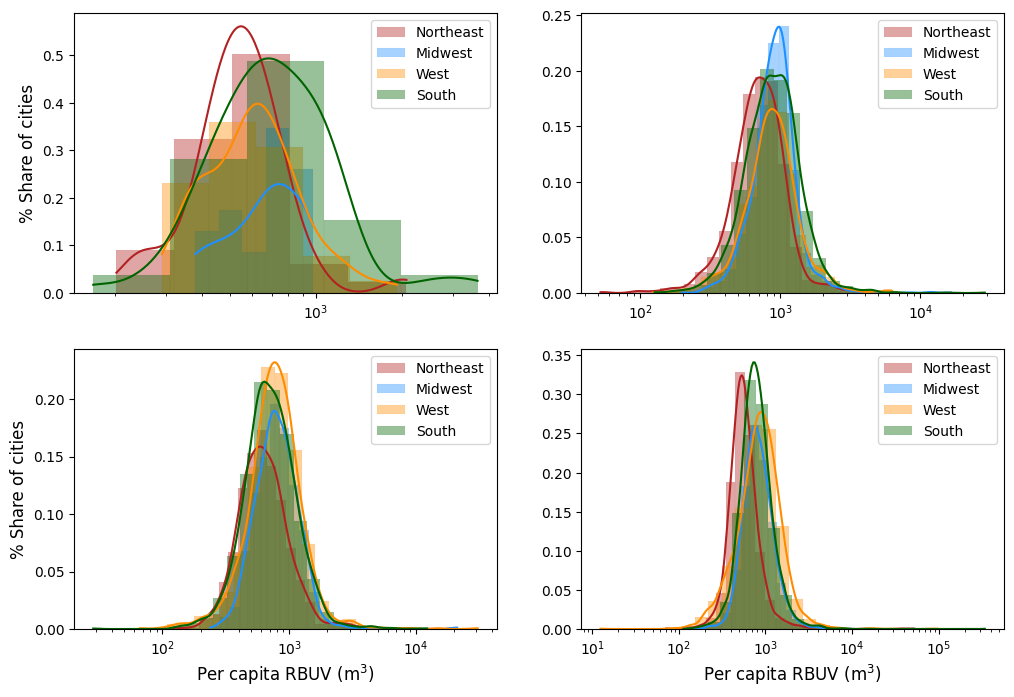

In [38]:
hue = 'REGION'
col_name = 'volume_m3_perCap_2020_ssp2'
hu_order = ['Northeast', 'Midwest', 'West', 'South']
citytypes = ['urban', 'suburban', 'periurban', 'rural']
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (12,8))
ax = axs.flatten()
for i, c in enumerate(citytypes):
    if c == 'urban':
        binno = 5
    else:
        binno = 25
    sns.histplot(df_ssp[(df_ssp['REGION'] == 'Northeast') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='Northeast',
                 log_scale=True,linewidth=0.01, alpha = .40, kde=True, color = 'firebrick', kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                 )
    sns.histplot(df_ssp[(df_ssp['REGION'] == 'Midwest') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='Midwest',
                    log_scale=True, linewidth=0.01, alpha = .40, kde=True, color = 'dodgerblue',kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                    #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                    )

    sns.histplot(df_ssp[(df_ssp['REGION'] == 'West') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='West',
                    log_scale=True, linewidth=0.01, alpha = .40, kde=True, color = 'darkorange',kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                    #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                    )
    sns.histplot(df_ssp[(df_ssp['REGION'] == 'South') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='South',
                    log_scale=True, linewidth=0.01, alpha = .40, kde=True, color = 'darkgreen',kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                    #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                    )

    ax[i].legend()
    # legend = ax[i].get_legend()
    # handles = legend.legend_handles
    if i > 1:
        ax[i].set_xlabel("Per capita RBUV (m$^3$)", fontsize=12)
    else:
        ax[i].set_xlabel("", fontsize=12)
    if i % 2 == 0:
        ax[i].set_ylabel("% Share of cities", fontsize=12)
    else:
        ax[i].set_ylabel("", fontsize=12)

plt.savefig(r'outputfiles\figures\RBUV_by_city_by_region_norm.png', transparent=True,  bbox_inches='tight')
plt.show()


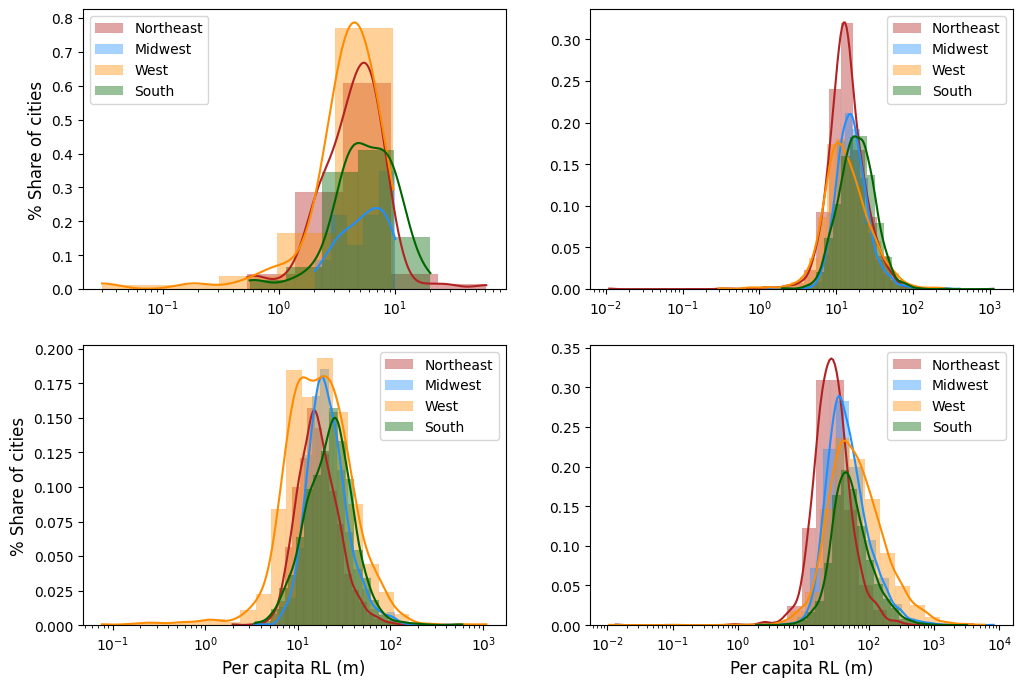

In [39]:
hue = 'REGION'
col_name = 'length_m_perCap_2020_ssp2'
hu_order = ['Northeast', 'Midwest', 'West', 'South']
citytypes = ['urban', 'suburban', 'periurban', 'rural']
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (12,8))
ax = axs.flatten()
for i, c in enumerate(citytypes):
    if c == 'urban':
        binno = 5
    else:
        binno = 25
    sns.histplot(df_ssp[(df_ssp['REGION'] == 'Northeast') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='Northeast',
                 log_scale=True,linewidth=0.01, alpha = .40, kde=True, color = 'firebrick', kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                 )
    sns.histplot(df_ssp[(df_ssp['REGION'] == 'Midwest') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='Midwest',
                    log_scale=True, linewidth=0.01, alpha = .40, kde=True, color = 'dodgerblue',kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                    #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                    )

    sns.histplot(df_ssp[(df_ssp['REGION'] == 'West') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='West',
                    log_scale=True, linewidth=0.01, alpha = .40, kde=True, color = 'darkorange',kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                    #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                    )
    sns.histplot(df_ssp[(df_ssp['REGION'] == 'South') & (df_ssp['city type'] == c)][col_name], stat = 'proportion',label='South',
                    log_scale=True, linewidth=0.01, alpha = .40, kde=True, color = 'darkgreen',kde_kws = {'cut': 0}, bins = binno ,ax=ax[i],
                    #  palette=['red', 'lightseagreen', 'dimgrey', 'darkkhaki'],
                    )

    ax[i].legend()
    # legend = ax[i].get_legend()
    # handles = legend.legend_handles
    if i > 1:
        ax[i].set_xlabel("Per capita RL (m)", fontsize=12)
    else:
        ax[i].set_xlabel("", fontsize=12)
    if i % 2 == 0:
        ax[i].set_ylabel("% Share of cities", fontsize=12)
    else:
        ax[i].set_ylabel("", fontsize=12)

plt.savefig(r'outputfiles\figures\RL_by_city_by_region_norm.png', transparent=True,  bbox_inches='tight')

plt.show()

### Variation with region and city type

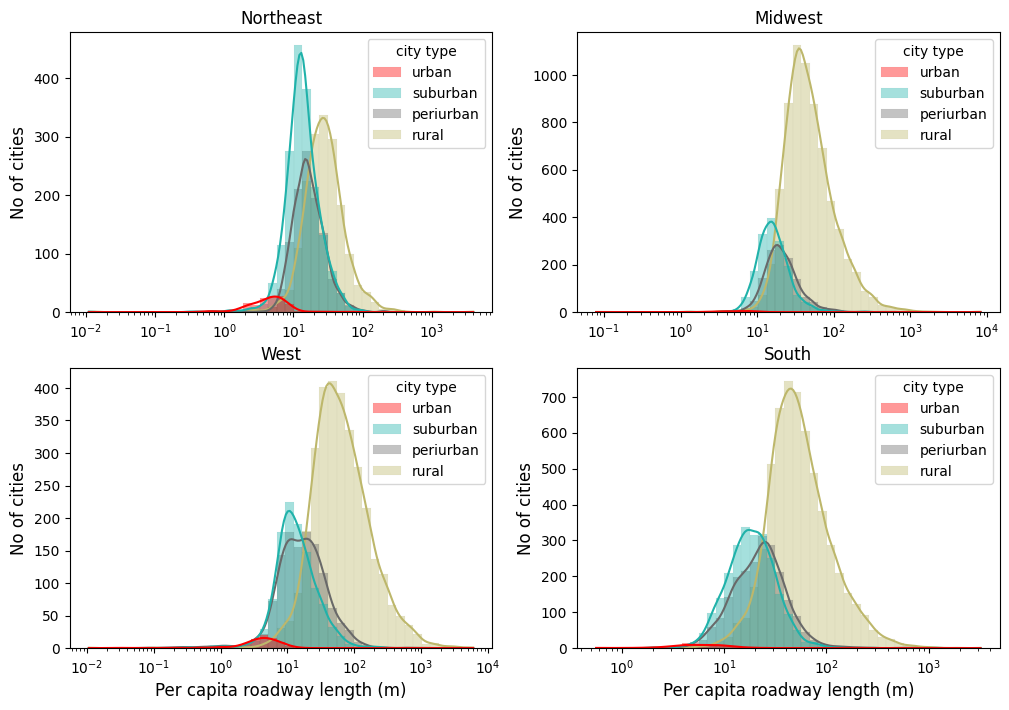

In [40]:
hue = 'city type'
hu_order = ['urban', 'suburban', 'periurban', 'rural']
citytypes = ['Northeast', 'Midwest', 'West', 'South']
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (12,8))
ax = axs.flatten()
for i, city in enumerate(citytypes):
    df_plot = df_ssp[df_ssp['REGION'] == city]
    sns.histplot(df_plot, x = 'length_m_perCap_2020_ssp2', log_scale=True, bins = 45,linewidth=0.01, alpha = .40, hue =hue, hue_order = hu_order, kde=True, kde_kws = {'cut': 0}, ax=ax[i],
                 palette = ['red', 'lightseagreen', 'dimgrey', 'darkkhaki'], ) # ['red', 'orange', 'green', 'tan'],)
    ax[i].set_ylabel("No of cities", fontsize=12)
    ax[i].set_title(city)
    if i >1:
        ax[i].set_xlabel("Per capita roadway length (m)", fontsize=12)
    else:
        ax[i].set_xlabel("", fontsize=10)

### temopral shift of per capita median values